# Pyplot 教程
关于pylot接口的介绍。

#pyplot 简介
matplotlib.pyplot 是命令样式函数的集合，使matplotlib像MATLAB一样工作。 每个pyplot函数对图形进行一些更改：例如，创建图形，在图形中创建绘图区域，在绘图区域中绘制一些线条，用标签装饰图形等。

使用pyplot生成可视化非常快速：

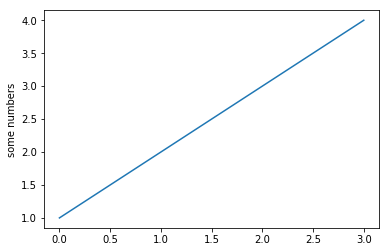

In [81]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

你可能想知道为什么x轴的范围是0-3，y轴的范围是1-4。如果为plot()命令提供单个列表或数组，则matplotlib假定它是一系列y值，并自动为你生成x值。由于python范围以0开头，因此默认的x向量与y具有相同的长度，但从0开始。因此x数据为 [0,1,2,3]

plot() 是一个多功能命令，将采用任意数量的参数。 例如，要绘制x与y的关系，你可以发出命令：

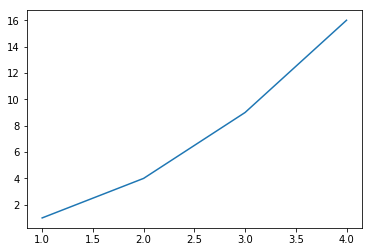

In [82]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# 格式化绘图的样式
对于每对x，y对的参数，有一个可选的第三个参数，它是指示绘图的颜色和线型的格式字符串。格式字符串的字母和符号来自MATLAB，您可以将颜色字符串与线型字符串连接起来。默认格式字符串为“b-”，为蓝色实线。例如，要用红色圆圈绘制上述内容：

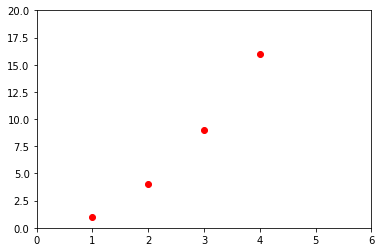

In [83]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

有关线型和格式字符串的完整列表，请参阅 plot() 文档。 上例中的 axis() 命令采用 [xmin, xmax, ymin, ymax] 列表并指定轴的视口。

如果matplotlib仅限于使用列表，那么数字处理将毫无用处。通常，您将使用numpy数组。实际上，所有序列都在内部转换为numpy数组。 下面的示例说明了使用数组在一个命令中绘制具有不同格式样式的多行。

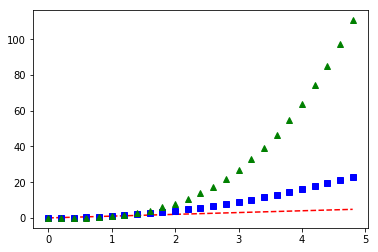

In [84]:
import numpy as np

t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# 使用关键字字符串绘图
在某些情况下，您可以使用允许您使用字符串访问特定变量的格式的数据。例如，使用 numpy.recarray 或pandas.DataFrame。

Matplotlib允许您使用data关键字参数提供此类对象。如果提供，那么您可以生成包含与这些变量对应的字符串的图。

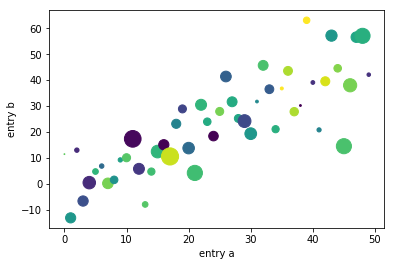

In [85]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# 用分类变量绘图
也可以使用分类变量创建绘图。Matplotlib允许您将分类变量直接传递给许多绘图函数。例如：

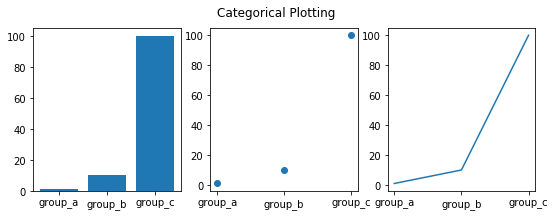

In [86]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

控制线的属性
线可以设置许多属性：linewidth，dash style，antialiased等; 请参阅 matplotlib.lines.Line2D。 有几种方法可以设置线属性。

+ 使用关键字args：

        plt.plot(x, y, linewidth=2.0)
        
+ 使用Line2D实例的setter方法。 plot返回Line2D对象列表; 例如，line1，line2 = plot（x1，y1，x2，y2）。 在下面的代码中，我们假设我们只有一行，因此返回的列表的长度为1.我们使用tuple解压缩为line，以获取该列表的第一个元素：

        line, = plt.plot(x, y, '-')
        line.set_antialiased(False) # turn off antialising

+ 使用 setp() 命令。 下面的示例使用MATLAB样式命令在行列表上设置多个属性。setp透明地使用对象列表或单个对象。您可以使用python关键字参数或MATLAB样式的字符串/值对：

        lines = plt.plot(x1, y1, x2, y2)
        # use keyword args
        plt.setp(lines, color='r', linewidth=2.0)
        # or MATLAB style string value pairs
        plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

# 使用多个图形和轴
MATLAB和pyplot，都有当前图形和当前轴的概念。所有打印命令都适用于当前轴。函数gca() 返回当前轴(matplotlib.axes.Axes实例)，gcf() 返回当前地物(matplotlib.figure.Figure实例)。通常情况下，你不必担心这一点，因为这一切都是在幕后处理的。下面是创建两个子图的脚本。

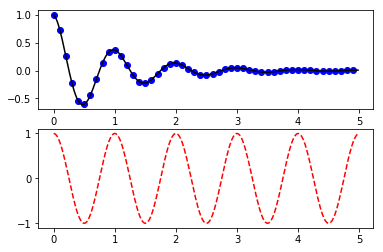

In [87]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

这里的 figure() 命令是可选的，因为默认情况下将创建 figure(1)，就像默认情况下创建 subplot(111) 一样，如果不手动指定任何轴。subplot()命令指定numrows, numcols, plot_number，其中 plot_number 的范围 从1到numrows*numcols。如果 numrows * numcols <10，则subplot命令中的逗号是可选的。因此 subplot(211) 与 subplot(2, 1, 1) 相同。

您可以创建任意数量的子图和轴。如果要手动放置轴，即不在矩形网格上，请使用 axes() 命令，该命令允许您将位置指定为axes([left，bottom，width，height])，其中所有值均为小数（0到1）坐标。有关手动放置轴的示例，请参阅Axes Demo;有关具有大量子图的示例，请参阅 Basic Subplot Demo。

您可以使用具有增加的图号的多个figure() 调用来创建多个数字。当然，每个图形可以包含您心中所需的轴和子图：

d:\python36\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Easy as 1, 2, 3')

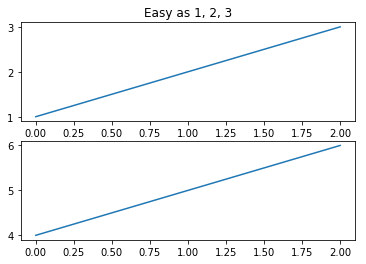

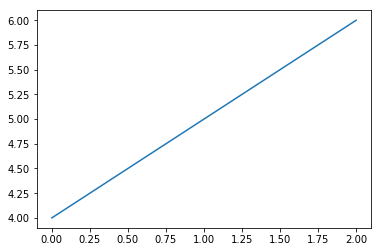

In [88]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# 使用文本
text() 命令可用于在任意位置添加文本，而xlabel(), ylabel() 和 title() 用于在指定位置添加文本(有关更详细的示例，请参见Matplotlib图中的文本)

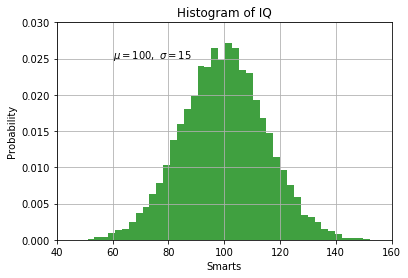

In [89]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有text() 命令都返回一个matplotlib.text.Text实例。与上面的行一样，您可以通过将关键字参数传递给文本函数或使用setp()来自定义属性：

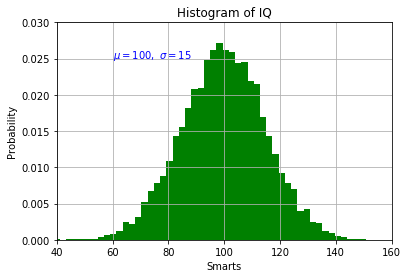

In [90]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, facecolor='g', density=True)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
t = plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.setp(t, color='blue')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
# plt.xlabel('my data', fontsize=14, color='red')
plt.show()

# 标准正态分布

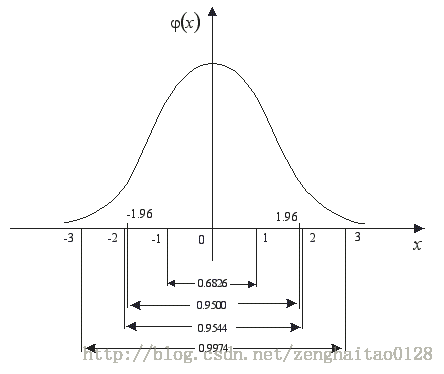

# 在文本中使用数学表达式
matplotlib在任何文本表达式中接受TeX方程表达式。 例如，要在标题中写入表达式σi= 15，您可以编写由美元符号包围的TeX表达式：

    plt.title(r'$\sigma_i=15$')
    

Text(0.5, 1.0, '$\\sigma_i=15$')

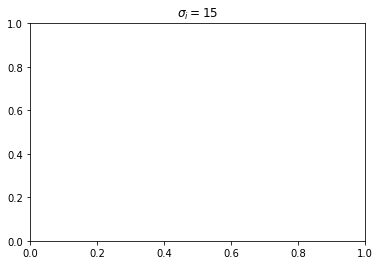

In [91]:
import matplotlib.pyplot as plt

plt.title('$\sigma_i=15$')

# 下标和上标
为了制作下标和上标，使用_或者^符号：

    r'$\alpha_i > \beta_i$'
    

Text(0.5, 1.0, '$\\alpha_i > \\beta_i$')

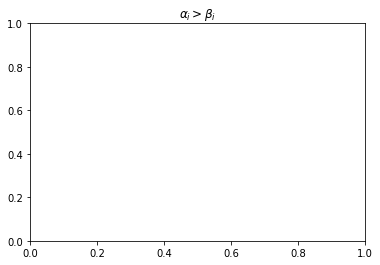

In [92]:
plt.title(r'$\alpha_i > \beta_i$')

一些符号会自动将它们的下标或上标放在操作符的底部或顶部，例如，为了编写 0 到无穷的  的和，你可以：

Text(0.5, 1.05, '$\\sum_{i=0}^\\infty x_i$')

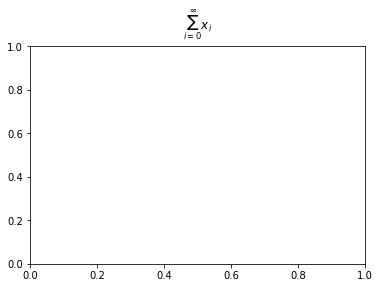

In [93]:
plt.title(r'$\sum_{i=0}^\infty x_i$', y=1.05)

# 分数

Text(0.5, 1.05, '$\\frac{\\frac{3}{4} - x}{5}$')

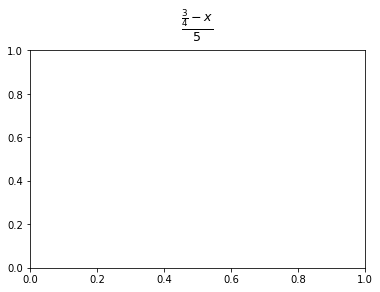

In [94]:
plt.title(r"$\frac{3}{4}$",fontsize= 18,y=1.05)
plt.title(r"$\frac{\frac{3}{4} - x}{5}$",fontsize= 18,y=1.05)

# 根式
根式可以有\sqrt[]{}产生，例如

Text(0.5, 1.05, '$\\sqrt[3]{4}$')

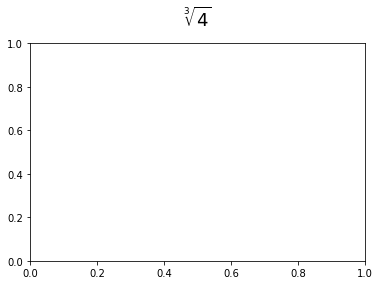

In [95]:
plt.title(r"$\sqrt[3]{4}$",fontsize= 18,y=1.05)

# 符号
你也可以使用更大量的 TeX 符号，比如\infty，\leftarrow，\sum，\int

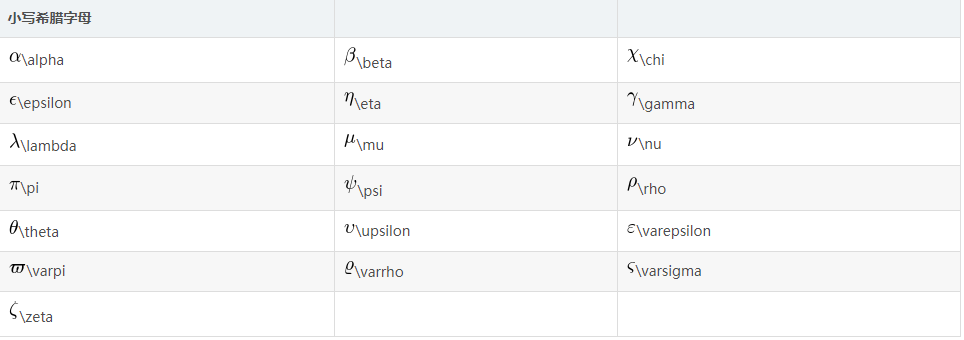


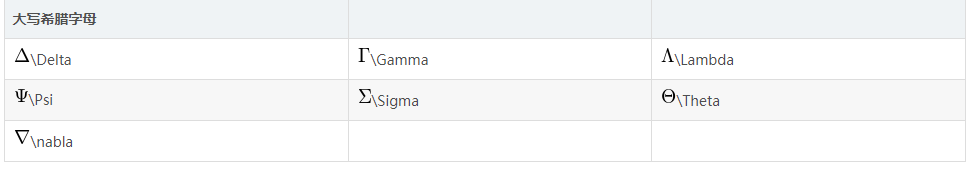

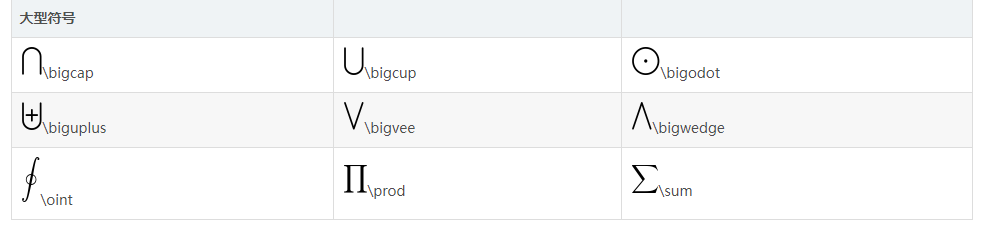

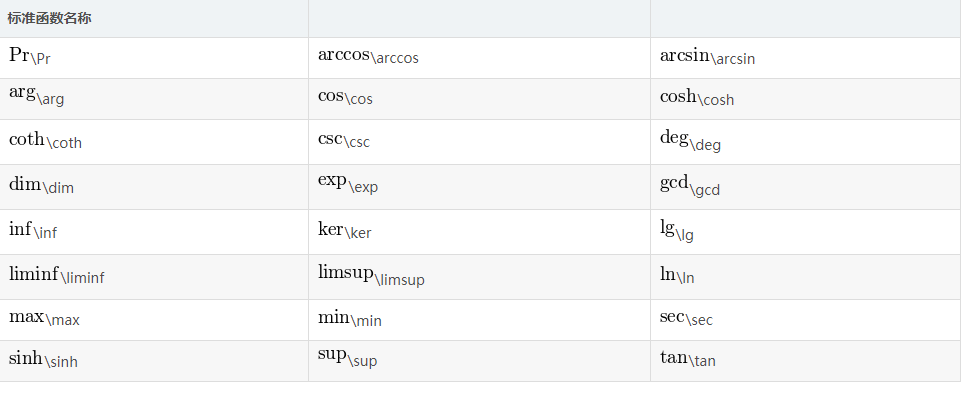

# 注释文本
上面的基本text() 命令的使用将文本放在Axes上的任意位置。文本的常见用途是注释绘图的某些功能，而annotate()方法提供帮助功能以使注释变得容易。在注释中，有两点需要考虑：由参数xy表示的注释位置和文本xytext的位置。 这两个参数都是（x，y）元组。

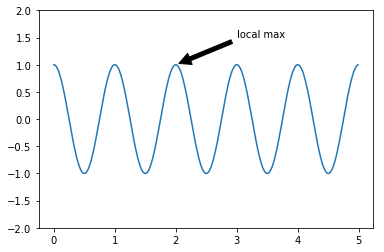

In [96]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

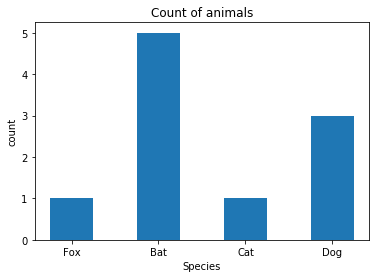

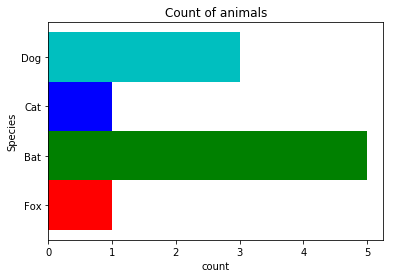

In [97]:
#纵向
testNames = ["Fox", "Bat", "Cat", "Dog"]
plt.title("Count of animals")
plt.xlabel("Species")
plt.ylabel("count")
rects = plt.bar([0,1,2,3],[1,5,1,3],
                 align='center', #edge
                 tick_label=testNames,width=0.5)
plt.show()
#水平方向
testNames = ["Fox", "Bat", "Cat", "Dog"]
plt.title("Count of animals")
plt.ylabel("Species")
plt.xlabel("count")
rects = plt.barh([0,1,2,3],[1,5,1,3],
                 align='center',
                 tick_label=testNames, color=['r','g','b','c'],height=1)
plt.show()

# 堆叠的条形图

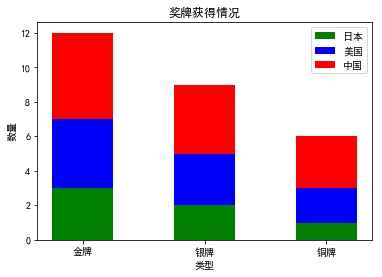

In [98]:
#纵向 带图例
#正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

testNames = ["金牌", "银牌", "铜牌"]
plt.title("奖牌获得情况")
plt.xlabel("类型")
plt.ylabel("数量")
jpScore= [3,2,1]
usScore = [4,3,2]
chnScore = [5,4,3]
# 日本
plt.bar([0,1,2],jpScore,
                 align='center', #edge
                 width=0.5,label='日本',color='g')
# 美国
plt.bar([0,1,2],usScore,
                 align='center', #edge
                 width=0.5,label='美国',color='b', bottom = jpScore)
#中国
plt.bar([0,1,2],chnScore,
                 align='center', #edge
                 width=0.5,label='中国',color='r', bottom= np.array(usScore) + np.array(jpScore))
plt.xticks([0,1,2],testNames)
plt.legend()
plt.show()

# 分组条形图

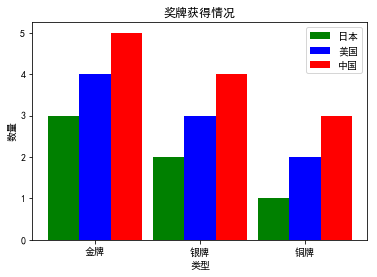

In [99]:
#正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

testNames = ["金牌", "银牌", "铜牌"]
plt.title("奖牌获得情况")
plt.xlabel("类型")
plt.ylabel("数量")
jpScore= [3,2,1]
usScore = [4,3,2]
chnScore = [5,4,3]
x = np.array([0,1,2])
width = 0.3
# 日本
plt.bar(x - width ,jpScore,
                 align='center', #edge
                 width=width,label='日本',color='g')
# 美国
plt.bar(x, usScore,
                 align='center', #edge
                 width=width,label='美国',color='b')
#中国
plt.bar(x + width,chnScore,
                 align='center', #edge
                 width=width,label='中国',color='r')
plt.xticks([0,1,2],testNames)
plt.legend()
plt.show()

# 附加表格

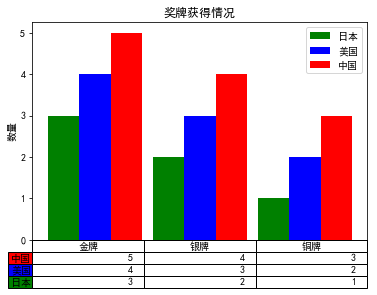

In [100]:
#正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

testNames = ["金牌", "银牌", "铜牌"]
plt.title("奖牌获得情况")
#plt.xlabel("类型")
plt.ylabel("数量")
jpScore= [3,2,1]
usScore = [4,3,2]
chnScore = [5,4,3]
# table data
table = [chnScore, usScore, jpScore]
indices = np.array([0,1,2])
width = 0.3
# 日本
plt.bar(indices - width ,jpScore,
                 align='center', #edge
                 width=width,label='日本',color='g')
# 美国
plt.bar(indices, usScore,
                 align='center', #edge
                 width=width,label='美国',color='b')
#中国
plt.bar(indices + width,chnScore,
                 align='center', #edge
                 width=width,label='中国',color='r')
#plt.xticks([0,1,2],testNames)
#清除默认x轴刻度
plt.xticks([])
plt.legend()
plt.table(cellText=table,
                      rowLabels=["中国","美国","日本"],
                      rowColours=['r','b','g'],
                      colLabels=testNames,
                      loc='bottom')
plt.show()


# 饼状图

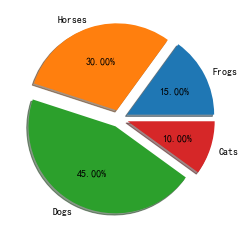

In [101]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Horses', 'Dogs', 'Cats']
sizes = [15, 30, 45, 10]
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=0)

plt.show()

# hist2d

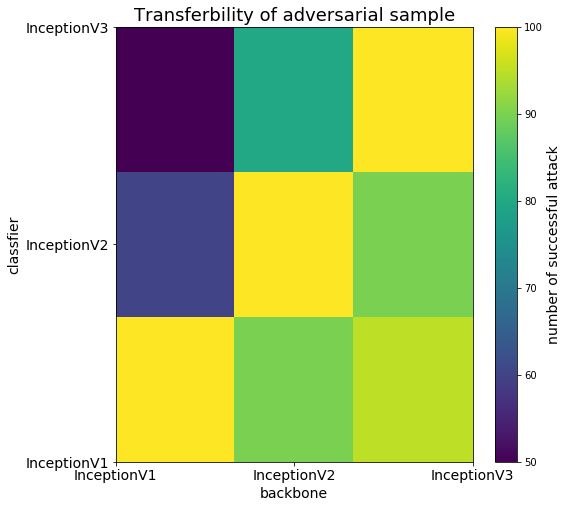

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,8))
plt.title("Transferbility of adversarial sample",fontsize=18)
net = ["InceptionV1", "InceptionV2", "InceptionV3"]

plt.ylabel("classfier", fontsize=14)
plt.xlabel("backbone", fontsize=14)
x = []
y = []
# 假定每个backbone生成100个样本，评估这100个样本在其他分类器上的迁移性
successCount = [[100,60,50],[90,100,80],[95,90,100]]
for xIndex,count in zip(range(0,3),successCount):
    for yIndex,c in zip(range(0,3),count):
        x += [xIndex] * c
        y += [yIndex] * c
        
plt.xticks([0,1,2], net, fontsize=14)
plt.yticks([0,1,2], net, fontsize=14)
plt.hist2d(x,y, bins=3)
cbar = plt.colorbar()
cbar.ax.set_ylabel('number of successful attack',fontsize=14)
plt.show()